# Covid-19's impact on USD to Turkish Lira exchange rate






## Libraries


In [1]:
import numpy as np 
import pandas as pd 
from statistics import mean
import os

#For Visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
#from matplotlib import pyplot

#Sci-kit Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import KFold,cross_val_score
from sklearn import linear_model
from sklearn.datasets import make_regression

#TenserFlow - Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.train import latest_checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/privatedatset/forex_usd_data.csv
/kaggle/input/privatedatset/data.csv


## Preprocessing Data

In [2]:
money_df = pd.read_csv('/kaggle/input//privatedatset/forex_usd_data.csv')
covid_df = pd.read_csv('/kaggle/input//privatedatset/data.csv')


Normalized the columns of Covid-19 data.

In [3]:
def normalize(df,column):
  df[column]=((df[column]-df[column].min())/
                       (df[column].max()-df[column].min()))


I split the data according to first seen Covid-19 case in Turkey.

I dropped some dates because other data which is we are going to use have not got that dates.



In [4]:
covid_df = covid_df[49:518] 

normalize(covid_df,"Confirmed") 
normalize(covid_df,"Deaths") 
normalize(covid_df,"Active") 
normalize(covid_df,"Recovered") 

covid_df

,Date,Confirmed,Recovered,Deaths,Active
49,2020-03-11,0.000000e+00,0.000000,0.000000,0.000000
50,2020-03-12,0.000000e+00,0.000000,0.000000,0.000000
51,2020-03-13,7.432547e-07,0.000000,0.000000,0.000001
52,2020-03-14,7.432547e-07,0.000000,0.000000,0.000001
53,2020-03-15,9.290684e-07,0.000000,0.000000,0.000002
...,...,...,...,...,...
513,2021-06-18,9.959106e-01,0.996429,0.995496,0.031414
514,2021-06-19,9.969289e-01,0.997229,0.996531,0.031862
515,2021-06-20,9.978748e-01,0.998034,0.997809,0.032157
516,2021-06-21,9.988585e-01,0.999006,0.998844,0.032211


I changed the selected currencies to Turkish lira.

In [5]:
money_df = money_df[3357:]
money_df = money_df[["date(y-m-d)","Euro","Turkish Lira","British Pound"]]
money_df["British Pound"] = money_df["Turkish Lira"] /money_df["British Pound"]
money_df["Euro"] = money_df["Turkish Lira"] /money_df["Euro"]
money_df.rename(columns={"Turkish Lira": "USD","date(y-m-d)":"Date"},inplace=True)

money_df


,Date,Euro,USD,British Pound
3357,2020-03-11,6.986957,6.197710,7.988428
3358,2020-03-12,6.996707,6.310358,7.920411
3359,2020-03-13,7.006242,6.320338,7.860413
3360,2020-03-14,7.035972,6.332382,7.776158
3361,2020-03-15,7.041839,6.333127,7.770546
...,...,...,...,...
3821,2021-06-18,10.369369,8.734576,12.068565
3822,2021-06-19,10.366237,8.737380,12.062406
3823,2021-06-20,10.369498,8.740087,12.068909
3824,2021-06-21,10.404416,8.764014,12.109307


Checked that are there any null values ​​inside data frames or not

In [6]:
money_df.isnull().mean() * 100

Date             0.0
Euro             0.0
USD              0.0
British Pound    0.0
dtype: float64

In [7]:
covid_df.isnull().mean() * 100

Date         0.0
Confirmed    0.0
Recovered    0.0
Deaths       0.0
Active       0.0
dtype: float64

## Visualizing the Relationships Between Patient Types and USD/TL

In [8]:
import plotly.express as px
fig = px.line(covid_df, x="Date", y=covid_df.columns,
              title='Covid-19 Patient Types in Turkey')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [9]:
import plotly.express as px
fig = px.line(money_df, x="Date", y=money_df.columns,
              title='Exhchenge rate of currencies to Turkish Lira')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [10]:

fig = go.Figure()
fig.add_trace(go.Scatter( x=covid_df["Confirmed"],y=money_df["USD"],
                    mode='lines',marker_color='blue',name='Total Cases'))
fig.update_layout(title_text='Confirmed Covid19 Patients - USD/Turkish Lira', template='ggplot2')
fig.show()




In [11]:
temp_covid = covid_df.sort_values(by=['Active'])


temp_money = money_df.set_index('Date')
temp_money = temp_money.reindex(index=covid_df['Date'])
temp_money = temp_money.reset_index()
 

fig = go.Figure()
fig.add_trace(go.Scatter( x=temp_covid["Active"],y=temp_money["USD"],
                    mode='lines',marker_color='gold',name='Total Cases'))
fig.update_layout(title_text='Confirmed Covid19 Patients - USD/Turkish Lira', template='plotly_dark')
fig.show()




## Merge Two Dataset

In [12]:
left = money_df[["Date","USD"]]
right = covid_df
df = pd.merge(left, right, on="Date")
df

,Date,USD,Confirmed,Recovered,Deaths,Active
0,2020-03-11,6.197710,0.000000e+00,0.000000,0.000000,0.000000
1,2020-03-12,6.310358,0.000000e+00,0.000000,0.000000,0.000000
2,2020-03-13,6.320338,7.432547e-07,0.000000,0.000000,0.000001
3,2020-03-14,6.332382,7.432547e-07,0.000000,0.000000,0.000001
4,2020-03-15,6.333127,9.290684e-07,0.000000,0.000000,0.000002
...,...,...,...,...,...,...
464,2021-06-18,8.734576,9.959106e-01,0.996429,0.995496,0.031414
465,2021-06-19,8.737380,9.969289e-01,0.997229,0.996531,0.031862
466,2021-06-20,8.740087,9.978748e-01,0.998034,0.997809,0.032157
467,2021-06-21,8.764014,9.988585e-01,0.999006,0.998844,0.032211


## Correlation

<AxesSubplot:>

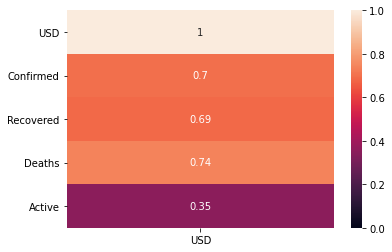

In [13]:
corr = df.corr()
x = corr[['USD']]
sns.heatmap(x, annot = True, vmin=0, vmax=1)

## Forecasting

### Forecasting Deaths

In [14]:
from fbprophet import Prophet

confirmed = df[["Date","Deaths"]]
confirmed['Date'] = pd.to_datetime(confirmed['Date'],errors='coerce')
confirmed.rename(columns={"Deaths": "y","Date":"ds"},inplace=True)

temp = Prophet(interval_width=0.95)
temp.fit(confirmed)
future = temp.make_future_dataframe(periods=120)
future_confirmed = future.copy() # for non-baseline predictions later on


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
forecast = temp.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
584,2021-10-16,1.605721,1.377082,1.823954
585,2021-10-17,1.610243,1.381647,1.835384
586,2021-10-18,1.614793,1.383059,1.840587
587,2021-10-19,1.619377,1.385442,1.853547
588,2021-10-20,1.625087,1.384612,1.855343


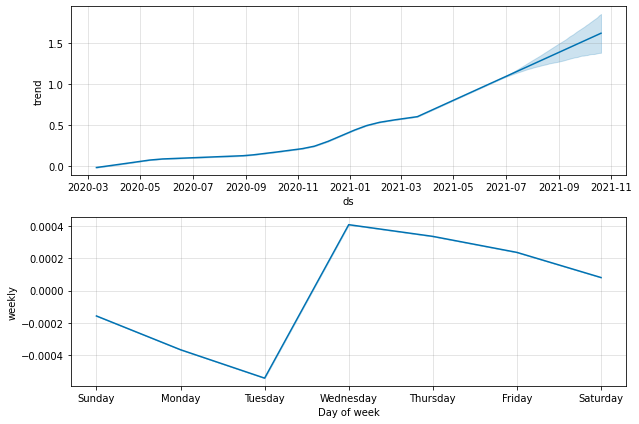

In [16]:
forecast_components = temp.plot_components(forecast)


In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-11,-0.014762,-0.035375,0.006491,-0.014762,-0.014762,0.000409,0.000409,0.000409,0.000409,0.000409,0.000409,0.0,0.0,0.0,-0.014353
1,2020-03-12,-0.013334,-0.034102,0.006861,-0.013334,-0.013334,0.000336,0.000336,0.000336,0.000336,0.000336,0.000336,0.0,0.0,0.0,-0.012998
2,2020-03-13,-0.011907,-0.032590,0.008792,-0.011907,-0.011907,0.000237,0.000237,0.000237,0.000237,0.000237,0.000237,0.0,0.0,0.0,-0.011670
3,2020-03-14,-0.010479,-0.031516,0.009300,-0.010479,-0.010479,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.0,0.0,0.0,-0.010398
4,2020-03-15,-0.009051,-0.029414,0.010595,-0.009051,-0.009051,-0.000156,-0.000156,-0.000156,-0.000156,-0.000156,-0.000156,0.0,0.0,0.0,-0.009208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2021-10-16,1.605639,1.377082,1.823954,1.380984,1.823839,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.0,0.0,0.0,1.605721
585,2021-10-17,1.610399,1.381647,1.835384,1.382663,1.834714,-0.000156,-0.000156,-0.000156,-0.000156,-0.000156,-0.000156,0.0,0.0,0.0,1.610243
586,2021-10-18,1.615159,1.383059,1.840587,1.385004,1.844902,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,0.0,0.0,0.0,1.614793
587,2021-10-19,1.619919,1.385442,1.853547,1.385008,1.852072,-0.000541,-0.000541,-0.000541,-0.000541,-0.000541,-0.000541,0.0,0.0,0.0,1.619377


In [18]:
test = forecast[469:]
test = test[["yhat"]]
test.rename(columns= {"yhat": "Deaths"},inplace=True)

### Forecasting Recovered

In [19]:
from fbprophet import Prophet

confirmed = df[["Date","Recovered"]]
confirmed['Date'] = pd.to_datetime(confirmed['Date'],errors='coerce')
confirmed.rename(columns={"Recovered": "y","Date":"ds"},inplace=True)

temp = Prophet(interval_width=0.95)
temp.fit(confirmed)
future = temp.make_future_dataframe(periods=120)
future_confirmed = future.copy() # for non-baseline predictions later on


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
forecast = temp.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
584,2021-10-16,1.758995,1.425783,2.105418
585,2021-10-17,1.763903,1.422105,2.113133
586,2021-10-18,1.768834,1.424921,2.129682
587,2021-10-19,1.773900,1.435117,2.147263
588,2021-10-20,1.780440,1.444001,2.144012


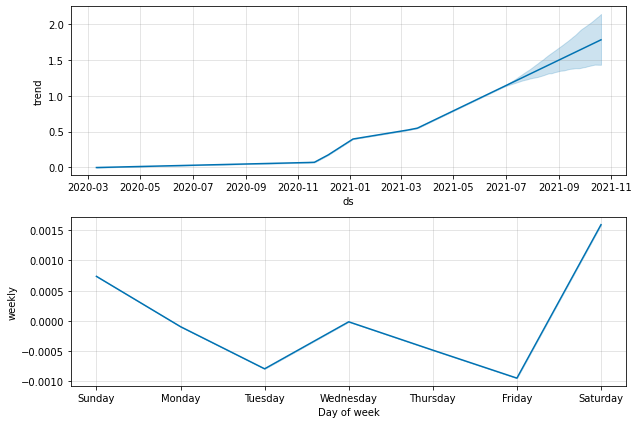

In [21]:
forecast_components = temp.plot_components(forecast)

In [22]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-11,-0.002566,-0.054934,0.051015,-0.002566,-0.002566,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,0.0,0.0,0.0,-0.002580
1,2020-03-12,-0.002273,-0.056390,0.053952,-0.002273,-0.002273,-0.000483,-0.000483,-0.000483,-0.000483,-0.000483,-0.000483,0.0,0.0,0.0,-0.002756
2,2020-03-13,-0.001980,-0.059604,0.049119,-0.001980,-0.001980,-0.000946,-0.000946,-0.000946,-0.000946,-0.000946,-0.000946,0.0,0.0,0.0,-0.002926
3,2020-03-14,-0.001688,-0.053325,0.058760,-0.001688,-0.001688,0.001592,0.001592,0.001592,0.001592,0.001592,0.001592,0.0,0.0,0.0,-0.000095
4,2020-03-15,-0.001395,-0.054710,0.054686,-0.001395,-0.001395,0.000738,0.000738,0.000738,0.000738,0.000738,0.000738,0.0,0.0,0.0,-0.000657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2021-10-16,1.757403,1.425783,2.105418,1.433066,2.099490,0.001592,0.001592,0.001592,0.001592,0.001592,0.001592,0.0,0.0,0.0,1.758995
585,2021-10-17,1.763166,1.422105,2.113133,1.432743,2.107908,0.000738,0.000738,0.000738,0.000738,0.000738,0.000738,0.0,0.0,0.0,1.763903
586,2021-10-18,1.768928,1.424921,2.129682,1.432419,2.118676,-0.000095,-0.000095,-0.000095,-0.000095,-0.000095,-0.000095,0.0,0.0,0.0,1.768834
587,2021-10-19,1.774691,1.435117,2.147263,1.432096,2.129814,-0.000792,-0.000792,-0.000792,-0.000792,-0.000792,-0.000792,0.0,0.0,0.0,1.773900


In [23]:
recovered_test = forecast[469:]
test["Recovered"] = recovered_test["yhat"]
test

,Deaths,Recovered
469,1.058676,1.094652
470,1.063364,1.099946
471,1.068024,1.105246
472,1.072629,1.113548
473,1.077150,1.118456
...,...,...
584,1.605721,1.758995
585,1.610243,1.763903
586,1.614793,1.768834
587,1.619377,1.773900


### Forecasting Confirmed

In [24]:
confirmed = df[["Date","Confirmed"]]
confirmed['Date'] = pd.to_datetime(confirmed['Date'],errors='coerce')
confirmed.rename(columns={"Confirmed": "y","Date":"ds"},inplace=True)

temp = Prophet(interval_width=0.95)
temp.fit(confirmed)
future = temp.make_future_dataframe(periods=120)
future_confirmed = future.copy() # for non-baseline predictions later on


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
forecast = temp.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
584,2021-10-16,1.699472,1.391087,1.997398
585,2021-10-17,1.703950,1.405146,2.005641
586,2021-10-18,1.708523,1.408358,2.017381
587,2021-10-19,1.713312,1.416219,2.029920
588,2021-10-20,1.719512,1.422805,2.041165


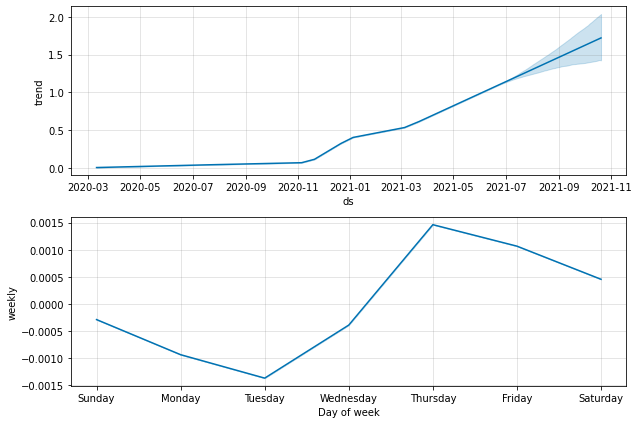

In [26]:
forecast_components = temp.plot_components(forecast)

In [27]:
forecast['new']=forecast['yhat']+forecast['yhat_lower']
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,new
0,2020-03-11,0.003556,-0.057316,0.060723,0.003556,0.003556,-0.000390,-0.000390,-0.000390,-0.000390,-0.000390,-0.000390,0.0,0.0,0.0,0.003166,-0.054150
1,2020-03-12,0.003842,-0.057549,0.067978,0.003842,0.003842,0.001462,0.001462,0.001462,0.001462,0.001462,0.001462,0.0,0.0,0.0,0.005304,-0.052245
2,2020-03-13,0.004129,-0.055143,0.062070,0.004129,0.004129,0.001066,0.001066,0.001066,0.001066,0.001066,0.001066,0.0,0.0,0.0,0.005195,-0.049948
3,2020-03-14,0.004415,-0.054153,0.066650,0.004415,0.004415,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.0,0.0,0.0,0.004870,-0.049283
4,2020-03-15,0.004701,-0.058642,0.059449,0.004701,0.004701,-0.000289,-0.000289,-0.000289,-0.000289,-0.000289,-0.000289,0.0,0.0,0.0,0.004413,-0.054229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2021-10-16,1.699017,1.391087,1.997398,1.420462,1.998828,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.0,0.0,0.0,1.699472,3.090559
585,2021-10-17,1.704238,1.405146,2.005641,1.424078,2.007476,-0.000289,-0.000289,-0.000289,-0.000289,-0.000289,-0.000289,0.0,0.0,0.0,1.703950,3.109096
586,2021-10-18,1.709459,1.408358,2.017381,1.427744,2.016922,-0.000936,-0.000936,-0.000936,-0.000936,-0.000936,-0.000936,0.0,0.0,0.0,1.708523,3.116881
587,2021-10-19,1.714681,1.416219,2.029920,1.425390,2.026305,-0.001369,-0.001369,-0.001369,-0.001369,-0.001369,-0.001369,0.0,0.0,0.0,1.713312,3.129531


In [28]:
confirm_test = forecast[469:]
test["Confirmed"] = confirm_test["yhat"]
test

,Deaths,Recovered,Confirmed
469,1.058676,1.094652,1.098184
470,1.063364,1.099946,1.105257
471,1.068024,1.105246,1.110082
472,1.072629,1.113548,1.114692
473,1.077150,1.118456,1.119170
...,...,...,...
584,1.605721,1.758995,1.699472
585,1.610243,1.763903,1.703950
586,1.614793,1.768834,1.708523
587,1.619377,1.773900,1.713312


###  Forecasting USD

In [29]:
confirmed = df[["Date","USD"]]
confirmed['Date'] = pd.to_datetime(confirmed['Date'],errors='coerce')
confirmed.rename(columns={"USD": "y","Date":"ds"},inplace=True)

temp = Prophet(interval_width=0.95)
temp.fit(confirmed)
future = temp.make_future_dataframe(periods=120)
future_confirmed = future.copy() # for non-baseline predictions later on


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
forecast = temp.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
584,2021-10-16,9.923445,8.041570,11.857831
585,2021-10-17,9.928402,8.035875,11.884133
586,2021-10-18,9.952714,8.100905,11.975397
587,2021-10-19,9.962697,8.028804,11.971186
588,2021-10-20,9.971523,8.036622,11.961921


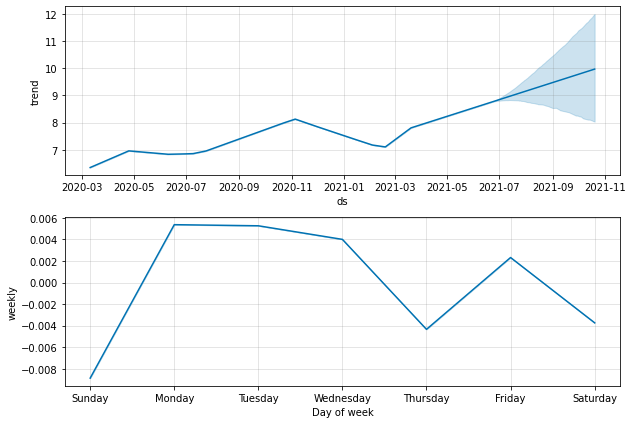

In [31]:
forecast_components = temp.plot_components(forecast)

In [32]:
forecast_usd = forecast[469:]
forecast_usd = forecast_usd[["yhat"]]

In [33]:
dates = forecast[469:]
dates = dates[["ds"]]

## Linear Regression


In [34]:
x = df[["Deaths","Recovered","Confirmed"]]
y = df.pop("USD")

df_empty = pd.DataFrame(0, index=range(120), columns=["linear"])


folds = KFold(n_splits = 5)
scores = []
lin_model = LinearRegression()
for n_fold, (train_index, valid_index) in enumerate(folds.split(x,y)):   
    x_train, x_val = x.iloc[list(train_index)], x.iloc[list(valid_index)]
    y_train, y_val = y.iloc[list(train_index)], y.iloc[list(valid_index)]
    
    lin_model.fit(x_train, y_train)
    y_pred = lin_model.predict(x_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    pred_test = lin_model.predict(test)
    df_empty["linear"] += pred_test
    scores.append(rmse)
df_empty["linear"] = df_empty["linear"]/5

print(df_empty["linear"])
print(mean(scores))


0      8.193308
1      8.199386
2      8.204198
3      8.197501
4      8.202937
         ...   
115    8.618737
116    8.624173
117    8.629710
118    8.635010
119    8.640872
Name: linear, Length: 120, dtype: float64
0.6680964316010115


In [35]:
rms = mean_squared_error(forecast_usd, df_empty["linear"], squared=False)
rms

0.9770589225856747

## DNN

In [36]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.1))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.1))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.1))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam')
NN_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [37]:
checkpoint_name = 'training_2/cp-{epoch:04d}.ckpt' 
checkpoint_dir = os.path.dirname(checkpoint_name)
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss',verbose = 1, save_weights_only = True,save_freq=1, mode ='auto')
early_stop = EarlyStopping(monitor='val_loss' 
                                 ,patience=10 
                                 ,verbose=1
                                 ,mode='auto' 
                                 ,restore_best_weights=True)
callbacks_list = [checkpoint,early_stop]
NN_model.save_weights(checkpoint_name.format(epoch=0))
NN_model.fit(x, y, epochs=300, batch_size=32, validation_split = 0.2,  callbacks=callbacks_list)


Epoch 1/300
 1/12 [=>............................] - ETA: 7s - loss: 51.2982
Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt
 3/12 [======>.......................] - ETA: 0s - loss: 52.6725
Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt
 6/12 [==============>...............] - ETA: 0s - loss: 52.8144
Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt
 9/12 [=====================>........] - ETA: 0s - loss: 52.8136
Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00001: saving model to training_2/cp-0001.ckpt
12/12 [==============================] - ETA: 0s - loss: 52.7295
Epoch 00001: saving model to training_2/cp-0001.ckpt
12/12 [=============

In [38]:
os.listdir(checkpoint_dir)

['cp-0002.ckpt.data-00000-of-00001',
 'cp-0025.ckpt.index',
 'cp-0022.ckpt.index',
 'cp-0023.ckpt.data-00000-of-00001',
 'cp-0016.ckpt.data-00000-of-00001',
 'cp-0002.ckpt.index',
 'cp-0017.ckpt.data-00000-of-00001',
 'cp-0013.ckpt.data-00000-of-00001',
 'cp-0019.ckpt.data-00000-of-00001',
 'cp-0000.ckpt.index',
 'cp-0013.ckpt.index',
 'cp-0005.ckpt.index',
 'cp-0006.ckpt.data-00000-of-00001',
 'cp-0014.ckpt.data-00000-of-00001',
 'cp-0018.ckpt.index',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0004.ckpt.index',
 'cp-0008.ckpt.index',
 'cp-0009.ckpt.index',
 'cp-0012.ckpt.index',
 'cp-0001.ckpt.data-00000-of-00001',
 'cp-0020.ckpt.index',
 'cp-0017.ckpt.index',
 'cp-0011.ckpt.data-00000-of-00001',
 'cp-0018.ckpt.data-00000-of-00001',
 'checkpoint',
 'cp-0025.ckpt.data-00000-of-00001',
 'cp-0020.ckpt.data-00000-of-00001',
 'cp-0022.ckpt.data-00000-of-00001',
 'cp-0012.ckpt.data-00000-of-00001',
 'cp-0026.ckpt.data-00000-of-00001',
 'cp-0003.ckpt.index',
 'cp-0010.ckpt.index',
 'cp-0007.c

I found the best-obtained result and used it.

In [39]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
print(latest)

training_2/cp-0026.ckpt


In [40]:
wights_file = latest # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


## Predicted USD to TL exhange rates

In [41]:
predictions = NN_model.predict(test)
predict = pd.DataFrame(predictions, columns = ['USD'])
predict

,USD
0,8.705081
1,8.721903
2,8.737831
3,8.754222
4,8.769547
...,...
115,10.672502
116,10.688493
117,10.704619
118,10.721011


Also,showed the forecasted USD to TL exhange rates.

In [42]:
forecast_usd.rename(columns={"yhat":"Forecasted USD"},inplace=True)
forecast_usd

,Forecasted USD
469,8.771263
470,8.773009
471,8.789753
472,8.793788
473,8.798745
...,...
584,9.923445
585,9.928402
586,9.952714
587,9.962697


Then find the mean squared error between them.

In [43]:
rms = mean_squared_error(forecast_usd, predictions, squared=False)
rms

0.42521022731988306

In [44]:
forecast_usd["Predicted USD"] = predictions
forecast_usd["Date"] = dates


forecast_usd

,Forecasted USD,Predicted USD,Date
469,8.771263,8.705081,2021-06-23
470,8.773009,8.721903,2021-06-24
471,8.789753,8.737831,2021-06-25
472,8.793788,8.754222,2021-06-26
473,8.798745,8.769547,2021-06-27
...,...,...,...
584,9.923445,10.672502,2021-10-16
585,9.928402,10.688493,2021-10-17
586,9.952714,10.704619,2021-10-18
587,9.962697,10.721011,2021-10-19


In [45]:
fig = px.line(forecast_usd, x="Date", y=forecast_usd.columns,
              title='Forecasted USD vs Predicted USD')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()